# Create 100 foot buffer around buildings

To make sure buffer areas are accurate, transform data to an equal area projection. We will use California Teale-Albers (EPSG: 3310). 

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from geopandas import GeoDataFrame

sys.path.append("../utils")

import config

# pd.set_option("display.max_colwidth", None)

In [3]:
# Import SB buildings dataset
sb_buildings_path = os.path.join(
    config.data_dir, "microsoft_buildings", "sb_buildings.geojson"
)

sb_buildings = gpd.read_file(sb_buildings_path)
sb_buildings = sb_buildings.to_crs("EPSG:3310")

### Buffer buildings polygons

Create a 100 foot buffer around all of the building polygons. 100 feet = ~30.48 meters.

In [ ]:
# Create a buffer for the building polygons
sb_buildings_buffered = sb_buildings.copy()
sb_buildings_buffered["geometry"] = sb_buildings.geometry.buffer(
    30.48, resolution=50, cap_style=3, join_style=2
).envelope

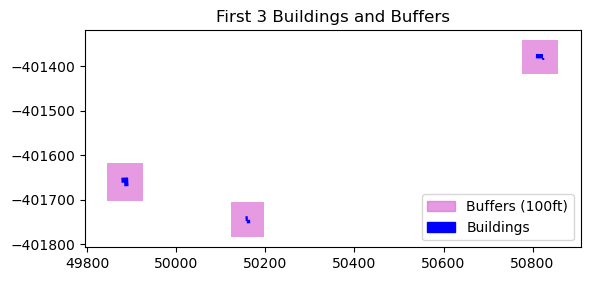

In [37]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create patches for the legend
buffer_patch = plt.Rectangle((0, 0), 1, 1, color="orchid", alpha=0.7)
building_patch = plt.Rectangle((0, 0), 1, 1, color="blue")

# Plot the buffered buildings
sb_buildings_buffered.head(3).plot(
    ax=ax, color="orchid", alpha=0.7, label="Buffers (100ft)"
)

# Plot the buildings
sb_buildings.head(3).plot(ax=ax, color="blue", label="Buildings")

# Add labels and legend
plt.title("First 3 Buildings and Buffers")
ax.legend([buffer_patch, building_patch], ["Buffers (100ft)", "Buildings"], loc='lower right')
plt.show()

### Clip buffers to parcel areas

In [21]:
# Import joined parcel data
joined_2022_path = os.path.join(
    config.data_dir, "joined_inspections_parcels", "joined_2022.geojson"
)
joined_2022 = gpd.read_file(joined_2022_path)
joined_2022 = joined_2022.to_crs("EPSG:3310")

In [22]:
# Subset the buffered buildings polygons to only include those that intersect with the joined parcels
sb_buildings_buffered_joined = gpd.overlay(
    sb_buildings_buffered, joined_2022, how="intersection"
)

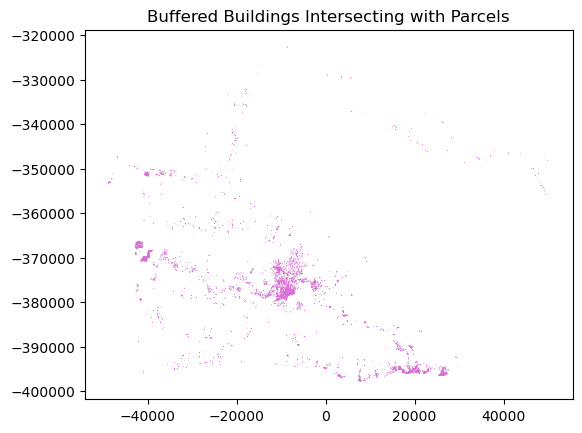

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the buildings
sb_buildings_buffered_joined.plot(ax=ax, alpha=0.7, color="orchid")

# Add labels and legend
plt.title("Buffered Buildings Intersecting with Parcels")
plt.show()

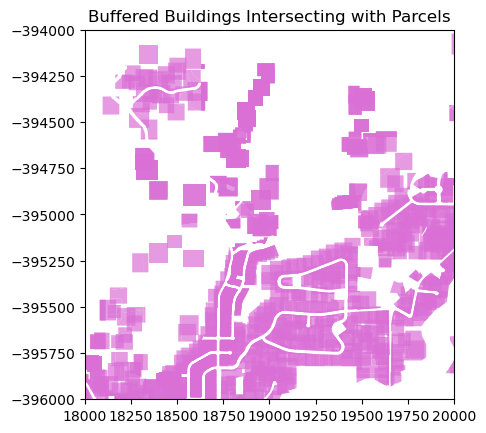

In [42]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the buildings
sb_buildings_buffered_joined.plot(ax=ax, alpha=0.7, color="orchid")

# Set axis limits to zoom in on the buildings
ax.set_xlim(18000, 20000)
ax.set_ylim(-396000, -394000)

# Add labels and legend
plt.title("Buffered Buildings Intersecting with Parcels")
plt.show()